# Taking a quick look at all (winter 2022, winter 2023, winter 2024) stable water isotopes

Warning message:
“There were 2 warnings in `mutate()`.
The first warning was:
ℹ In argument: `dD = as.numeric(dD)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1 remaining warning.”


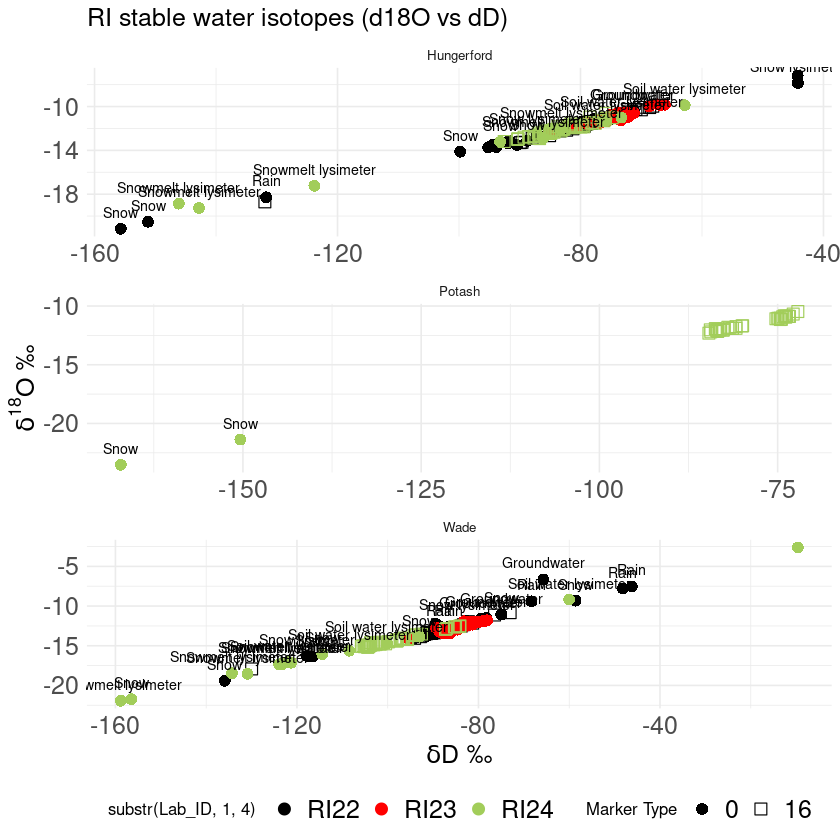

In [39]:
#################
# LOAD PACKAGES #
#################

library(tidyverse)
library(viridis)
library(dplyr)
library(lubridate)
library(readxl)

###################
# SET DIRECTORIES #
###################

setwd("~//OneDrive/git-repos/EMMA/isco_metadata/")

input_dir <- "isotopes_metadata/"
output_dir <- "isotopes_metadata/"

################
# READ IN DATA #
################

# Read in the compiled stable water isotope data
RI_isos <- read_xlsx(file.path(input_dir, "RI-series_isotopes_2022-2024.xlsx"))

####################
# CLEAN THE DATA   #
####################

# Ensure dD and d18O are numeric, and group 'Bear_Pond' and 'High_Pond_Farm' with 'Wade'
RI_isos <- RI_isos %>%
  mutate(dD = as.numeric(dD), 
         d18O = as.numeric(d18O),
         Site = case_when(
           Site %in% c("Bear_Pond", "High_Pond_Farm") ~ "Wade",  # Group Bear_Pond and High_Pond_Farm with Wade
           TRUE ~ Site
         ),
         # Categorize sample types: filled circles for specific types, open squares for others
         marker_shape = ifelse(`Sample type (presumed RI23)` %in% c("Isco", "Grab", "Isco/Grab", NA),
                               16,  # Filled circle marker
                               0))  # Open square marker

# Filter out rows with missing dD or d18O values
RI_isos <- RI_isos %>%
  filter(!is.na(dD), !is.na(d18O))

####################
# PLOT THE DATA    #
####################

# Create the plot
p <- ggplot(RI_isos, aes(x = dD, y = d18O)) +  # Swap x and y axes
  # Split into two panels by 'Site' using facet_wrap
  facet_wrap(~ Site, scales = "free", ncol = 1) +
  
  # Add points with shape determined by marker_shape and color by 'Lab_ID'
  geom_point(aes(color = substr(Lab_ID, 1, 4), shape = factor(marker_shape)), size = 3) +
  
  # Add text annotations for non-matching sample types, annotation text size is fixed
  geom_text(data = RI_isos %>% filter(!`Sample type (presumed RI23)` %in% c("Isco", "ISCO", "grab", "Grab", "Isco/grab", NA)),
            aes(label = `Sample type (presumed RI23)`), vjust = -1, size = 3) +
  
  # Customize the colors: black for RI22, red for RI23, green for RI24
  scale_color_manual(values = c("RI22" = "black", "RI23" = "red", "RI24" = "darkolivegreen3")) +
  
  # Customize shapes: 16 = filled circle, 0 = open square
  scale_shape_manual(values = c(16, 0)) +
  
  # Labels
  labs(title = "RI stable water isotopes (d18O vs dD)",
       x = expression(delta*D ~ "\u2030"),
       y = expression(delta^18*O ~ "\u2030"),
       shape = "Marker Type") +
  
  # Customize the theme: Increase text size by 50% (base size of 15 is increased to 22.5)
  theme_minimal(base_size = 10) +  # 
  theme(
    legend.position = "bottom",  # Keep legend position
    plot.title = element_text(size = rel(1.5)),  # 50% larger title
    axis.title = element_text(size = rel(1.5)),  # 50% larger axis labels
    axis.text = element_text(size = rel(1.5)),   # 50% larger axis tick labels
    legend.text = element_text(size = rel(1.5))  # 50% larger legend text
  )

# Save the plot with dimensions 10x10 inches
ggsave(file.path(output_dir, "stable_water_isotopes_plot.png"), plot = p, width = 10, height = 10, units = "in")

p